In [97]:
import pandas as pd
from sklearn import preprocessing, decomposition
import matplotlib.pyplot as plt
import numpy as np

## Load the dataset

In [98]:
input_file = "data.csv"
df = pd.read_csv(input_file, header = 0)

In [99]:
dataset = df.values
X = dataset[:,1:7]
y = dataset[:,7]

## Apply PCA

Normalize data for PCA

In [100]:
sc = preprocessing.StandardScaler()
X = sc.fit_transform(X)
X = sc.transform(X)

In [102]:
pca = decomposition.PCA(n_components=2, random_state=1)
X = pca.fit_transform(X)
X_new = pca.transform(X)

In [103]:
success = np.array([0.0,0.0])
failure = np.array([0.0,0.0])
for i in range(53):
    if y[i] == 0:
        failure = np.append(failure, X_new[i])
    else:
        success = np.append(success, X_new[i])
failure = failure.reshape((33,2))
success = success.reshape((22,2))

Stable: Orange, Unstable: Blue

Text(0.5, 1.0, 'PCA')

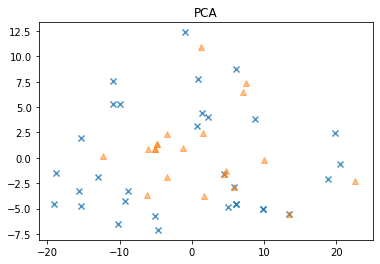

In [108]:
fig, ax = plt.subplots()
ax.scatter(failure[1:, 0], failure[1:, 1], alpha=0.8, marker="x")
ax.scatter(success[1:, 0], success[1:, 1], alpha=0.5, marker="^")
ax.set_title("PCA")